In [1]:
from pyspark.sql import SparkSession, functions as f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = (
    SparkSession.builder.appName("Preprocessing_Yellow")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.driver.memory', '3g')   
    .config('spark.executor.memory', '4g')  
    .config('spark.executor.instances', '2')  
    .config('spark.executor.cores', '2')
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
23/09/29 22:47:29 WARN Utils: Your hostname, LAPTOP-RELH58H1 resolves to a loopback address: 127.0.1.1; using 172.19.22.4 instead (on interface eth0)
23/09/29 22:47:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/29 22:47:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
joined = spark.read.parquet("../../../data/insights/joined.parquet/")

In [5]:
joined.show()

23/09/29 22:51:27 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------+--------------------+-------------+---------+----------------------------------+--------------------------+----------------------------------+--------------------------+----------------------------------------+----------------------+----------------+---------------------+--------------------------+------------------------------+-------------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-------------------+--------------------------------+---------------------------+------------------+------------------+--------------------+---------------------------------+--------------------+
|merchant_abn|                name|revenue_level|take_rate|average_merchant_fraud_probability|number_of_unique_consumers|average_consumer_fraud_probability|number_of_repeat_consumers|average_repeat_transactions_per_consumer|consumer_retainability|number_of_orders|average_cost_of_order|average_spend_per_c

In [ ]:
joined.select("average_cost_of_order").describe()

summary,average_cost_of_order
count,4026
mean,1160.4924749402778
stddev,2976.3760434060846
min,7.749091331586594
max,51876.637563877644


In [ ]:
joined.select("number_of_consumers").describe()

summary,number_of_consumers
count,4026
mean,1691.6631892697467
stddev,3236.9595380161886
min,1
max,20115


In [ ]:
joined.select("number_of_repeat_consumers").describe()

summary,number_of_repeat_consumers
count,4026
mean,461.55936413313464
stddev,1923.8906293930352
min,0
max,20113


In [ ]:
joined.select("number_of_postcodes").describe()

summary,number_of_postcodes
count,4026
mean,728.1028315946348
stddev,836.6012871413944
min,1
max,2639


In [ ]:
joined_pd = joined.toPandas()

In [ ]:
joined_pd.columns

Index(['merchant_abn', 'name', 'revenue_level', 'take_rate',
       'average_merchant_fraud_probability', 'number_of_consumers',
       'average_consumer_fraud_probability', 'number_of_repeat_consumers',
       'number_of_orders', 'average_cost_of_order', 'number_of_postcodes',
       'avg_total_weekly_personal_income', 'avg_total_weekly_fam_income',
       'avg_median_age', 'avg_num_of_consumers_per_postcode',
       'merchant_description'],
      dtype='object')

In [ ]:
numerical_columns = joined_pd[['take_rate',
       'average_merchant_fraud_probability', 'number_of_consumers',
       'average_consumer_fraud_probability', 'number_of_repeat_consumers',
       'number_of_orders', 'average_cost_of_order', 'number_of_postcodes',
       'avg_total_weekly_personal_income', 'avg_total_weekly_fam_income',
       'avg_median_age', 'avg_num_of_consumers_per_postcode']]

In [ ]:
numerical_columns.corr()

,take_rate,average_merchant_fraud_probability,number_of_consumers,average_consumer_fraud_probability,number_of_repeat_consumers,number_of_orders,average_cost_of_order,number_of_postcodes,avg_total_weekly_personal_income,avg_total_weekly_fam_income,avg_median_age,avg_num_of_consumers_per_postcode
take_rate,1.000000,0.012932,0.040926,-0.045964,0.029842,0.025704,-0.056220,0.053763,-0.005702,-0.004959,0.017578,0.023621
average_merchant_fraud_probability,0.012932,1.000000,-0.011440,0.448688,-0.001711,-0.004149,0.336876,-0.023327,0.003263,0.041377,-0.064606,-0.003184
number_of_consumers,0.040926,-0.011440,1.000000,-0.125568,0.860438,0.714404,-0.166813,0.845472,0.012810,0.013768,-0.002423,0.679935
average_consumer_fraud_probability,-0.045964,0.448688,-0.125568,1.000000,-0.060435,-0.058679,0.833149,-0.198182,-0.022574,-0.026019,-0.019908,-0.050510
number_of_repeat_consumers,0.029842,-0.001711,0.860438,-0.060435,1.000000,0.891458,-0.084322,0.514494,0.005745,0.006393,-0.000938,0.880154
number_of_orders,0.025704,-0.004149,0.714404,-0.058679,0.891458,1.000000,-0.080534,0.444787,0.005837,0.006418,-0.001257,0.998676
average_cost_of_order,-0.056220,0.336876,-0.166813,0.833149,-0.084322,-0.080534,1.000000,-0.253293,-0.080050,-0.079164,-0.044097,-0.070022
number_of_postcodes,0.053763,-0.023327,0.845472,-0.198182,0.514494,0.444787,-0.253293,1.000000,0.022511,0.023312,-0.004859,0.399703
avg_total_weekly_personal_income,-0.005702,0.003263,0.012810,-0.022574,0.005745,0.005837,-0.080050,0.022511,1.000000,0.863679,-0.421226,0.004944
avg_total_weekly_fam_income,-0.004959,0.041377,0.013768,-0.026019,0.006393,0.006418,-0.079164,0.023312,0.863679,1.000000,-0.431535,0.005463


<Axes: >

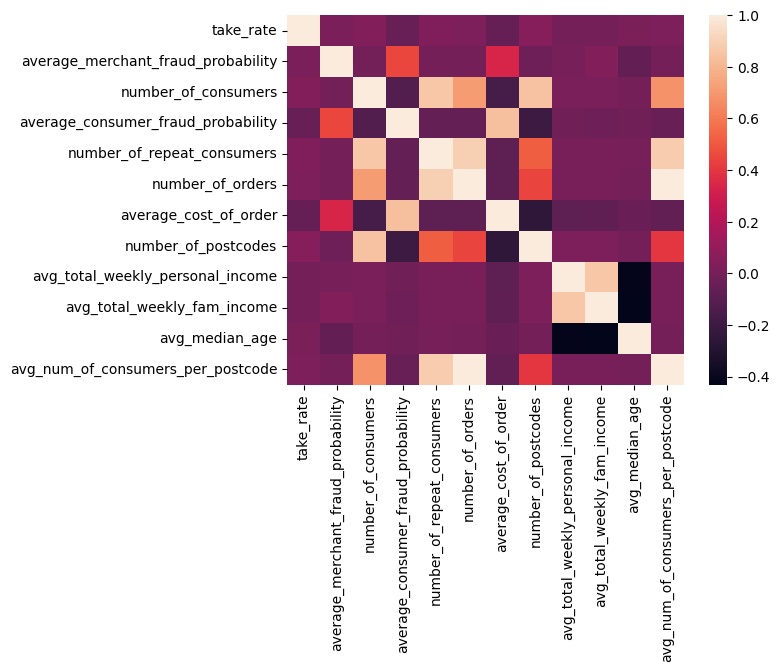

In [ ]:
sns.heatmap(numerical_columns.corr())

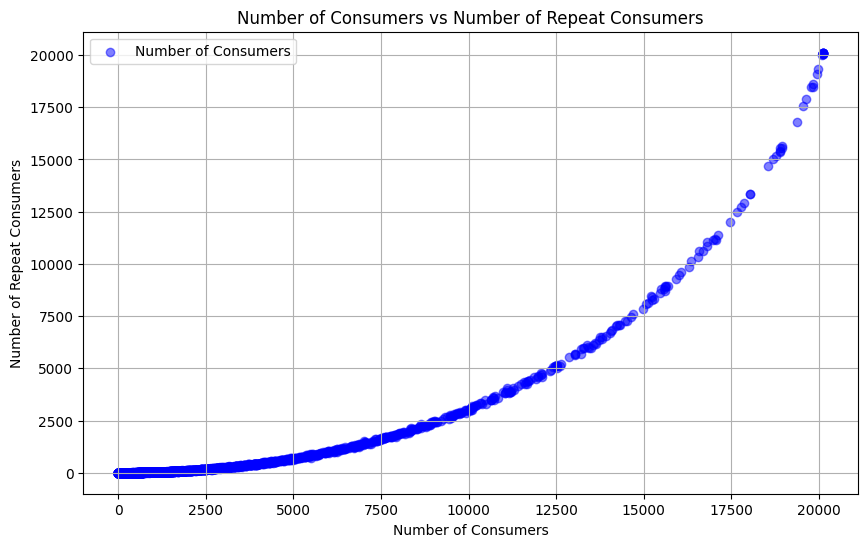

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(joined_pd['number_of_consumers'], joined_pd['number_of_repeat_consumers'], color='blue', label='Number of Consumers', alpha=0.5)
plt.title('Number of Consumers vs Number of Repeat Consumers')
plt.xlabel('Number of Consumers')
plt.ylabel('Number of Repeat Consumers')
plt.legend()
plt.grid(True)

In [ ]:
joined.select("number_of_orders").describe()

summary,number_of_orders
count,4026
mean,5206.861400894188
stddev,21774.22709023351
min,1
max,444597


In [ ]:
#spark.stop()